# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

Verificar se os arquivos existem:
Arquivo y_train.txt: True
Arquivo y_test.txt: True
Arquivo X_train_subset.csv: True
Arquivo X_test_subset.csv: True


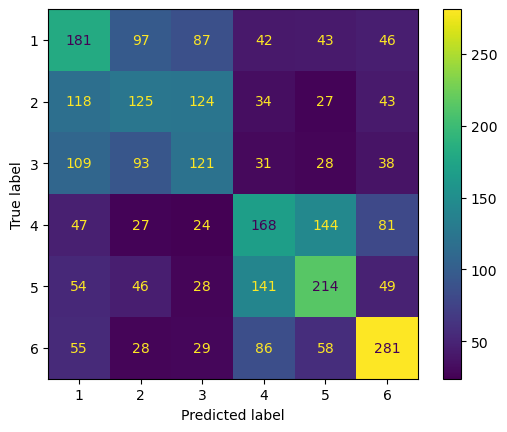

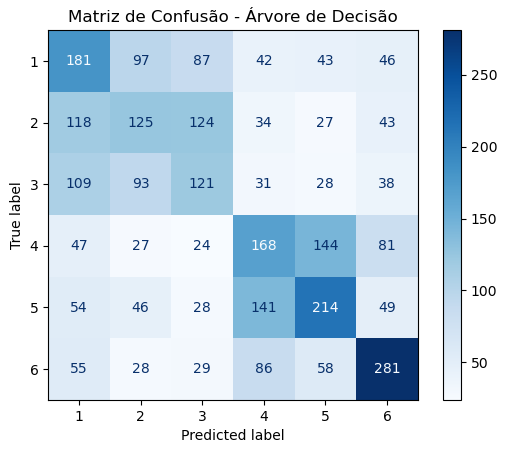

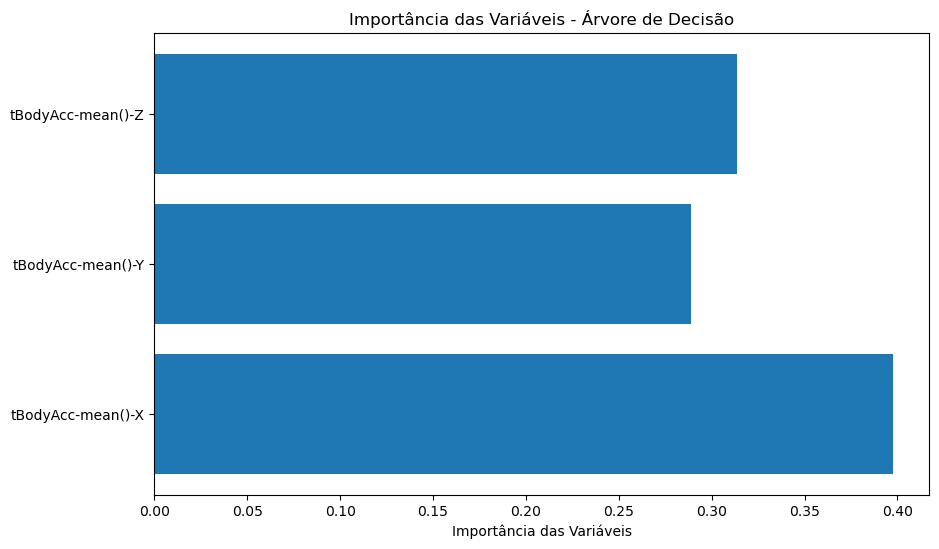

Acurácia no conjunto de treino: 1.0000
Acurácia no conjunto de teste: 0.3699


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import os

# Ajuste os caminhos conforme o local onde você salvou as bases de dados
dataset_path = r'C:/Users/conta/OneDrive/Área de Trabalho/PAULO/Ciência de Dados/EBAC/Aulas/Arvores II/UCI HAR Dataset/'

# Caminho dos arquivos CSV
csv_path = r'C:/Users/conta/OneDrive/Área de Trabalho/PAULO/Ciência de Dados/EBAC/Aulas/Arvores II/'

# Verificar se os arquivos realmente existem nos diretórios
print("Verificar se os arquivos existem:")
print(f"Arquivo y_train.txt: {os.path.exists(dataset_path + 'train/y_train.txt')}")
print(f"Arquivo y_test.txt: {os.path.exists(dataset_path + 'test/y_test.txt')}")
print(f"Arquivo X_train_subset.csv: {os.path.exists(csv_path + 'X_train_subset.csv')}")
print(f"Arquivo X_test_subset.csv: {os.path.exists(csv_path + 'X_test_subset.csv')}")

# Carregar as bases de dados (X_train, Y_train, X_test, Y_test)
X_train = pd.read_csv(csv_path + 'X_train_subset.csv', index_col=[0, 1])
Y_train = pd.read_csv(dataset_path + 'train/y_train.txt', header=None, names=["activity"]).squeeze()
X_test = pd.read_csv(csv_path + 'X_test_subset.csv', index_col=[0, 1])
Y_test = pd.read_csv(dataset_path + 'test/y_test.txt', header=None, names=["activity"]).squeeze()

# Treinar o modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

# Avaliar o modelo com a matriz de confusão
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()

# Visualizar a importância das variáveis
feature_importances = model.feature_importances_

# Criar um gráfico de barras para visualizar a importância
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances)
plt.xlabel("Importância das Variáveis")
plt.title("Importância das Variáveis - Árvore de Decisão")
plt.show()

# Avaliar a acurácia no conjunto de treino e teste
train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)

print(f"Acurácia no conjunto de treino: {train_accuracy:.4f}")
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Ajuste os caminhos conforme o local onde você salvou as bases de dados
dataset_path = r'C:/Users/conta/OneDrive/Área de Trabalho/PAULO/Ciência de Dados/EBAC/Aulas/Arvores II/UCI HAR Dataset/'

# Caminho dos arquivos CSV
csv_path = r'C:/Users/conta/OneDrive/Área de Trabalho/PAULO/Ciência de Dados/EBAC/Aulas/Arvores II/'

# Carregar as bases de dados (X_train, Y_train)
X_train = pd.read_csv(csv_path + 'X_train_subset.csv', index_col=[0, 1])
Y_train = pd.read_csv(dataset_path + 'train/y_train.txt', header=None, names=["activity"]).squeeze()

# Dividir a base de treino em 75% treino e 25% validação
X_train_split, X_val, Y_train_split, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

# Verificar o tamanho das bases após a divisão
print(f"Tamanho da base de treino: {X_train_split.shape[0]} registros")
print(f"Tamanho da base de validação: {X_val.shape[0]} registros")

# Exibir as primeiras linhas das bases de validação e treino
print("Primeiras linhas da base de treino:")
print(X_train_split.head())
print("Primeiras linhas da base de validação:")
print(X_val.head())

# Agora, X_train_split e Y_train_split são as novas bases de treino,
# e X_val e Y_val são as novas bases de validação.


Tamanho da base de treino: 5514 registros
Tamanho da base de validação: 1838 registros
Primeiras linhas da base de treino:
              tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
     subject                                                         
6593 28                0.217295          -0.028434          -0.035783
3519 17                0.294986          -0.009296          -0.131391
4376 22                0.277687          -0.021567          -0.119773
4294 21                0.284126          -0.016949          -0.110375
29   1                 0.279998          -0.019484          -0.105724
Primeiras linhas da base de validação:
              tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
     subject                                                         
4525 22                0.283203          -0.047024          -0.168986
1446 7                 0.256904          -0.036623          -0.133856
5995 27                0.291316          -0.001065          -0.07246

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

As 3 variáveis mais importantes e suas importâncias:
tBodyAcc-mean()-Z: 0.0650
tBodyAcc-mean()-Y: 0.2229
tBodyAcc-mean()-X: 0.7121


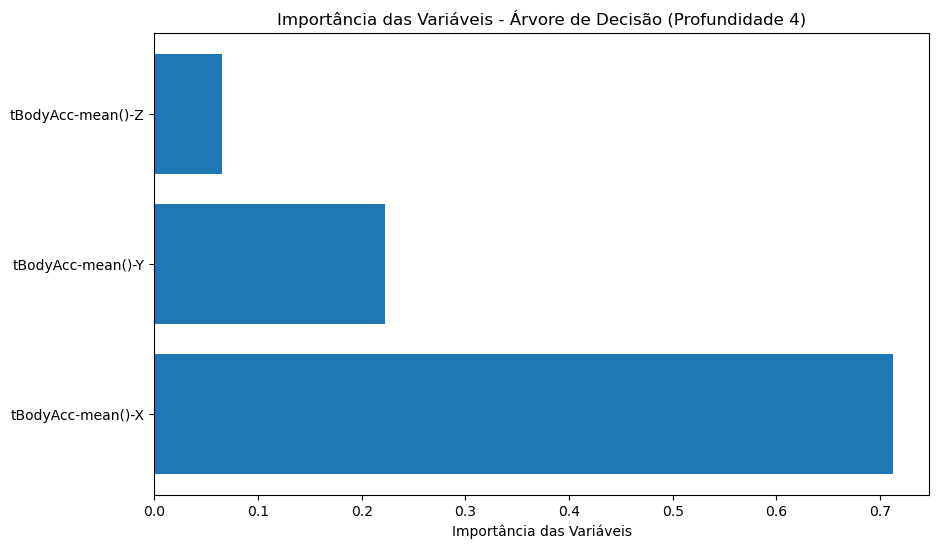

Primeiras linhas da base de treino com as 3 variáveis mais importantes:
              tBodyAcc-mean()-Z  tBodyAcc-mean()-Y  tBodyAcc-mean()-X
     subject                                                         
6593 28               -0.035783          -0.028434           0.217295
3519 17               -0.131391          -0.009296           0.294986
4376 22               -0.119773          -0.021567           0.277687
4294 21               -0.110375          -0.016949           0.284126
29   1                -0.105724          -0.019484           0.279998
Primeiras linhas da base de validação com as 3 variáveis mais importantes:
              tBodyAcc-mean()-Z  tBodyAcc-mean()-Y  tBodyAcc-mean()-X
     subject                                                         
4525 22               -0.168986          -0.047024           0.283203
1446 7                -0.133856          -0.036623           0.256904
5995 27               -0.072461          -0.001065           0.291316
4222 21      

In [11]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Treinar a árvore de decisão com profundidade máxima igual a 4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train_split, Y_train_split)

# Obter a importância das variáveis
feature_importances = clf.feature_importances_

# Obter os índices das 3 variáveis com maior importância
top_3_idx = np.argsort(feature_importances)[-3:]  # Índices das 3 variáveis mais importantes

# Obter os nomes das 3 variáveis mais importantes
top_3_features = X_train_split.columns[top_3_idx]

# Exibir as 3 variáveis mais importantes e seus valores de importância
print("As 3 variáveis mais importantes e suas importâncias:")
for feature, importance in zip(top_3_features, feature_importances[top_3_idx]):
    print(f"{feature}: {importance:.4f}")

# Visualizar a importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(X_train_split.columns, feature_importances)
plt.xlabel("Importância das Variáveis")
plt.title("Importância das Variáveis - Árvore de Decisão (Profundidade 4)")
plt.show()

# Selecionar apenas as 3 variáveis mais importantes para os próximos passos
X_train_top3 = X_train_split[top_3_features]
X_val_top3 = X_val[top_3_features]

# Exibir as primeiras linhas das novas bases
print("Primeiras linhas da base de treino com as 3 variáveis mais importantes:")
print(X_train_top3.head())
print("Primeiras linhas da base de validação com as 3 variáveis mais importantes:")
print(X_val_top3.head())


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

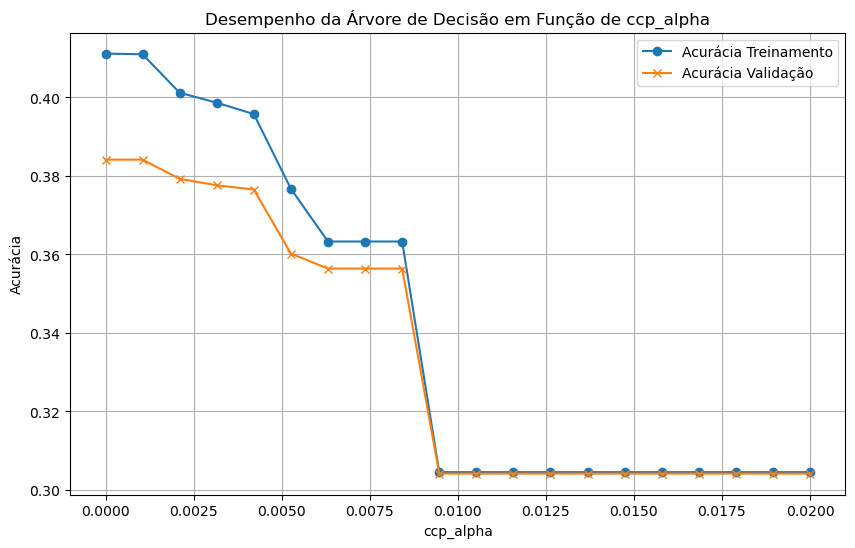

Melhor ccp_alpha: 0.0
Acurácia na base de validação com o melhor ccp_alpha: 0.3841


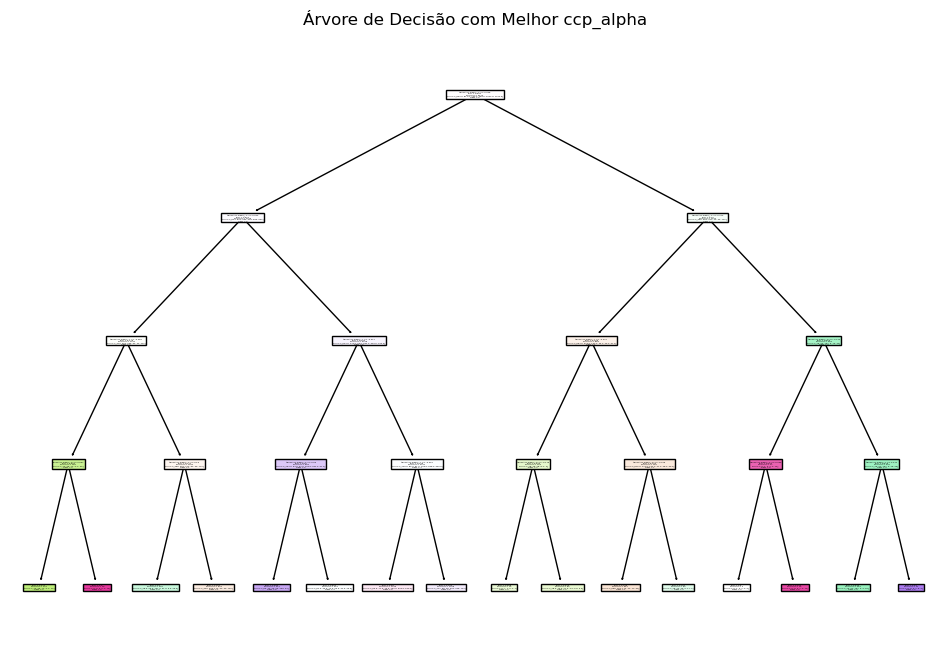

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Definir ccp_alpha (faixa de valores para busca)
ccp_alphas = np.linspace(0, 0.02, 20)  # Ajustar o intervalo conforme necessário

# Inicializar listas para armazenar acurácias de treino e validação
train_accuracies = []
val_accuracies = []
trees = []

# Ajustar a árvore para cada valor de ccp_alpha
for ccp in ccp_alphas:
    # Treinar o modelo de árvore de decisão com o valor de ccp_alpha atual
    tree = DecisionTreeClassifier(max_depth=4, ccp_alpha=ccp, random_state=42)
    tree.fit(X_train_top3, Y_train_split)
    trees.append(tree)
    
    # Acurácia na base de treino
    train_accuracy = tree.score(X_train_top3, Y_train_split)
    train_accuracies.append(train_accuracy)
    
    # Acurácia na base de validação
    val_accuracy = tree.score(X_val_top3, Y_val)
    val_accuracies.append(val_accuracy)

# Criar o gráfico de desempenho da árvore em função de ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_accuracies, label="Acurácia Treinamento", marker='o')
plt.plot(ccp_alphas, val_accuracies, label="Acurácia Validação", marker='x')

plt.xlabel("ccp_alpha")
plt.ylabel("Acurácia")
plt.title("Desempenho da Árvore de Decisão em Função de ccp_alpha")
plt.legend()
plt.grid(True)
plt.show()

# Encontrar o melhor ccp_alpha baseado na acurácia de validação
best_alpha_index = np.argmax(val_accuracies)
best_ccp_alpha = ccp_alphas[best_alpha_index]
best_tree = trees[best_alpha_index]

# Exibir o melhor ccp_alpha e sua acurácia correspondente
print(f"Melhor ccp_alpha: {best_ccp_alpha}")
print(f"Acurácia na base de validação com o melhor ccp_alpha: {val_accuracies[best_alpha_index]:.4f}")

# Obter os nomes das classes, que são os valores únicos de Y_train
class_names = [str(activity) for activity in sorted(Y_train.unique())]

# Visualizar a árvore gerada com o melhor ccp_alpha
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(best_tree, feature_names=X_train_top3.columns, class_names=class_names, filled=True)
plt.title("Árvore de Decisão com Melhor ccp_alpha")
plt.show()



### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [19]:
# Criar a versão da base de teste com as 3 variáveis mais importantes
X_test_top3 = X_test[top_3_features]

# Treinar a árvore de decisão final com o melhor ccp_alpha (0.0)
final_tree = DecisionTreeClassifier(max_depth=4, ccp_alpha=best_ccp_alpha, random_state=42)
final_tree.fit(X_train_top3, Y_train_split)

# Fazer previsões na base de testes
Y_test_pred = final_tree.predict(X_test_top3)  # Usar 'X_test_top3' agora

# Calcular a acurácia no conjunto de testes
test_accuracy = accuracy_score(Y_test, Y_test_pred)

# Exibir a acurácia no conjunto de testes
print(f"Acurácia no conjunto de testes: {test_accuracy:.4f}")



Acurácia no conjunto de testes: 0.3868


A acurácia de 38.68% no conjunto de testes indica que o modelo de árvore de decisão está classificando corretamente cerca de 39% das previsões, o que não é um desempenho alto, mas pode ser razoável considerando a complexidade do problema de classificação de múltiplas atividades.

A árvore foi treinada com apenas 3 variáveis, o que pode ter limitado seu poder preditivo. Além disso, o valor de ccp_alpha = 0.0 significa que não houve poda, o que pode ter levado ao overfitting nos dados de treino, resultando em um desempenho mais baixo nos testes.